<a href="https://colab.research.google.com/github/Dinahak/Project-Data/blob/main/ProjectDataGrp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#https://raw.githubusercontent.com/Dinahak/Project-Data/main/Project_data.xlsx


import pandas as pd
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/Dinahak/Project-Data/main/Project_data.xlsx'

response = requests.get(url)
project3 = pd.read_excel(BytesIO(response.content))

project3.head()

,Job_Title,Career_Switch,Salary_USD,Industry,Fav_Language,Happiness_Salary,Happiness_WorkLife,Happiness_Coworkers,Happiness_Management,Happiness_Mobility,Happiness_Learning,Difficulty_Breaking_In,Job_Priority,Gender,Age,Country,Education_Level,Ethnicity
0,Data Engineer,No,66k-85k,Finance,Python,2,1,1,1,3,7,Easy,Remote Work,Female,28,United States,Masters,Asian or Asian American
1,Data Analyst,Yes,66k-85k,Tech,Python,6,6,6,6,5,6,Difficult,Other (Please Specify):Currently very happy wi...,Female,24,United States,Bachelors,Hispanic or Latino
2,Other (Please Specify):Business Analyst,No,41k-65k,Other (Please Specify):Third Party Logistics,C/C++,3,6,7,7,1,3,Very Difficult,Better Salary,Male,29,United States,Bachelors,White or Caucasian
3,Data Analyst,No,66k-85k,Telecommunication,Python,4,6,4,5,4,4,Neither easy nor difficult,Better Salary,Male,24,United States,Masters,White or Caucasian
4,Data Analyst,Yes,41k-65k,Tech,Python,5,6,7,7,7,6,Difficult,Better Salary,Male,25,United States,Bachelors,Asian or Asian American


In [28]:
project3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job_Title               236 non-null    object
 1   Career_Switch           236 non-null    object
 2   Salary_USD              236 non-null    object
 3   Industry                236 non-null    object
 4   Fav_Language            236 non-null    object
 5   Happiness_Salary        236 non-null    int64 
 6   Happiness_WorkLife      236 non-null    int64 
 7   Happiness_Coworkers     236 non-null    int64 
 8   Happiness_Management    236 non-null    int64 
 9   Happiness_Mobility      236 non-null    int64 
 10  Happiness_Learning      236 non-null    int64 
 11  Difficulty_Breaking_In  236 non-null    object
 12  Job_Priority            236 non-null    object
 13  Gender                  236 non-null    object
 14  Age                     236 non-null    int64 
 15  Countr

In [29]:
project3.shape

(236, 18)

In [30]:
#Identify any remaining columns with missing values and discuss their potential impact on analysis, even if minimal

missing_info = project3.isnull().sum()
missing_info = missing_info[missing_info > 0]  # Filter only columns with missing values
missing_info

,0


In [31]:
#Reviewing column names
project3.columns.to_list()

['Job_Title',
 'Career_Switch',
 'Salary_USD',
 'Industry',
 'Fav_Language',
 'Happiness_Salary',
 'Happiness_WorkLife',
 'Happiness_Coworkers',
 'Happiness_Management',
 'Happiness_Mobility',
 'Happiness_Learning',
 'Difficulty_Breaking_In',
 'Job_Priority',
 'Gender',
 'Age',
 'Country',
 'Education_Level',
 'Ethnicity']

Descriptive Stat


In [32]:
project3.describe()

,Happiness_Salary,Happiness_WorkLife,Happiness_Coworkers,Happiness_Management,Happiness_Mobility,Happiness_Learning,Age
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,5.275424,6.593220,6.686441,6.088983,5.385593,6.211864,30.898305
std,2.438257,2.427633,2.376119,2.495214,2.559846,2.657312,6.890499
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000
25%,3.000000,5.000000,5.000000,5.000000,4.000000,4.000000,26.000000
50%,5.000000,7.000000,7.000000,6.000000,5.000000,6.000000,29.000000
75%,7.000000,9.000000,9.000000,8.000000,7.000000,8.000000,34.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,60.000000


In [33]:
#Calculate and interpret basic statistics (mean, median, mode) foreach ”Happiness” column

happiness_columns = [col for col in project3.columns if 'happiness' in col.lower()]
happiness_columns

['Happiness_Salary',
 'Happiness_WorkLife',
 'Happiness_Coworkers',
 'Happiness_Management',
 'Happiness_Mobility',
 'Happiness_Learning']

In [34]:
#Calculate mean .median ,mode
# Create a summary table
for col in happiness_columns:
    print(f"\nStatistics for: {col}")
    print(f"Mean:   {project3[col].mean()}")
    print(f"Median: {project3[col].median()}")
    print(f"Mode:   {project3[col].mode().tolist()}")


Statistics for: Happiness_Salary
Mean:   5.27542372881356
Median: 5.0
Mode:   [3]

Statistics for: Happiness_WorkLife
Mean:   6.593220338983051
Median: 7.0
Mode:   [6, 10]

Statistics for: Happiness_Coworkers
Mean:   6.686440677966102
Median: 7.0
Mode:   [10]

Statistics for: Happiness_Management
Mean:   6.088983050847458
Median: 6.0
Mode:   [5, 7]

Statistics for: Happiness_Mobility
Mean:   5.385593220338983
Median: 5.0
Mode:   [5]

Statistics for: Happiness_Learning
Mean:   6.211864406779661
Median: 6.0
Mode:   [10]


In [35]:
#statistics separately for male and female groups and compare the results. Are there any notable differences between genders?

# Find columns with "happiness" in the name
happiness_columns = [col for col in project3.columns if 'happiness' in col.lower()]
print("Happiness columns:", happiness_columns)

# Check unique values in the gender column
print("Gender values:", project3['Gender'].unique())

Happiness columns: ['Happiness_Salary', 'Happiness_WorkLife', 'Happiness_Coworkers', 'Happiness_Management', 'Happiness_Mobility', 'Happiness_Learning']
Gender values: ['Female' 'Male']


In [36]:
#grouping by Gender
for col in happiness_columns:
    print(f"\n--- Statistics for: {col} ---")

    grouped = project3.groupby('Gender')[col]

    for gender, data in grouped:
        print(f"\nGender: {gender}")
        print(f"  Mean:   {data.mean()}")
        print(f"  Median: {data.median()}")
        print(f"  Mode:   {data.mode().tolist()}")


--- Statistics for: Happiness_Salary ---

Gender: Female
  Mean:   5.208333333333333
  Median: 5.0
  Mode:   [4]

Gender: Male
  Mean:   5.304878048780488
  Median: 5.0
  Mode:   [3]

--- Statistics for: Happiness_WorkLife ---

Gender: Female
  Mean:   6.75
  Median: 7.0
  Mode:   [10]

Gender: Male
  Mean:   6.524390243902439
  Median: 6.0
  Mode:   [6]

--- Statistics for: Happiness_Coworkers ---

Gender: Female
  Mean:   6.569444444444445
  Median: 7.0
  Mode:   [10]

Gender: Male
  Mean:   6.737804878048781
  Median: 7.0
  Mode:   [5]

--- Statistics for: Happiness_Management ---

Gender: Female
  Mean:   5.847222222222222
  Median: 6.0
  Mode:   [5]

Gender: Male
  Mean:   6.195121951219512
  Median: 6.0
  Mode:   [6]

--- Statistics for: Happiness_Mobility ---

Gender: Female
  Mean:   5.291666666666667
  Median: 5.5
  Mode:   [6]

Gender: Male
  Mean:   5.426829268292683
  Median: 5.0
  Mode:   [5]

--- Statistics for: Happiness_Learning ---

Gender: Female
  Mean:   5.83333333

In [37]:
avg_happiness_by_job = project3.groupby('Job_Title')['Happiness_Salary'].mean().reset_index()
avg_happiness_by_job.columns = ['Job_Title', 'Avg_Happiness_Salary']
print(avg_happiness_by_job.sort_values('Avg_Happiness_Salary', ascending=False))




                                            Job_Title  Avg_Happiness_Salary
24  Other (Please Specify):Director of Data Analytics              9.000000
32                    Other (Please Specify):Manager               9.000000
23                    Other (Please Specify):Director              8.000000
14  Other (Please Specify):Business Intelligence A...              8.000000
29            Other (Please Specify):Insights analyst              8.000000
8            Other (Please Specify):Analytics Manager              7.500000
2                                      Data Scientist              7.166667
21                Other (Please Specify):Data manager              7.000000
25  Other (Please Specify):Does a social media ana...              7.000000
33  Other (Please Specify):Manager of a team of Da...              7.000000
4                              Other (Please Specify)              7.000000
28      Other (Please Specify):Informatics Specialist              7.000000
40      Othe

In [38]:
#Group data by ”Job Title” and find the average ”Happiness Salary”rating per job. Investigate differences between men and women in similar roles

project3.groupby('Job_Title')['Happiness_Salary'].mean().sort_values(ascending=False)


,Happiness_Salary
Job_Title,
Other (Please Specify):Director of Data Analytics,9.000000
Other (Please Specify):Manager,9.000000
Other (Please Specify):Director,8.000000
Other (Please Specify):Business Intelligence Analyst,8.000000
Other (Please Specify):Insights analyst,8.000000
Other (Please Specify):Analytics Manager,7.500000
Data Scientist,7.166667
Other (Please Specify):Data manager,7.000000
Other (Please Specify):Does a social media analyst count?,7.000000


In [39]:
#clean job titles

# Show the full index
with pd.option_context('display.max_rows', None):
    print(project3.index)



RangeIndex(start=0, stop=236, step=1)


In [40]:
# Peek at job titles
print(project3['Job_Title'].unique())

['Data Engineer' 'Data Analyst' 'Other (Please Specify):Business Analyst '
 'Other (Please Specify):Sr. Supply Chain Analyst '
 'Other (Please Specify):Director of Data Analytics'
 'Other (Please Specify):Learning Management Specialist'
 'Other (Please Specify):Research Analyst'
 'Other (Please Specify):Insights analyst'
 'Other (Please Specify):Does a social media analyst count?'
 'Data Scientist' 'Other (Please Specify):Educator'
 'Other (Please Specify):Analytics Manager'
 'Other (Please Specify):Business Analyst'
 'Other (Please Specify):Manager of a team of Data Analysts'
 'Other (Please Specify):Analyst'
 'Other (Please Specify):Analytics Engineer'
 'Other (Please Specify):software engineer' 'Database Developer'
 'Other (Please Specify):Database Manager' 'Other (Please Specify)'
 'Other (Please Specify):Billing analyst'
 'Other (Please Specify):Marketing Data Specialist'
 'Other (Please Specify):Jr. Data Scientist'
 'Other (Please Specify):Continuous Quality Improvement Specialis

In [41]:
# job titles containing others

project3[project3['Job_Title'].str.contains('Other' ,case= True, na=False)]

project3['Job_Title'] = project3['Job_Title'].str.replace(r'^Other \(Please Specify\):', '', regex=True).str.strip()

project3[project3['Job_Title'].str.contains('Other' ,case= True, na=False)]

#Change case for all into lower case
project3['Job_Title'] = project3['Job_Title'].str.lower()

project3.Job_Title.unique().tolist()





['data engineer',
 'data analyst',
 'business analyst',
 'sr. supply chain analyst',
 'director of data analytics',
 'learning management specialist',
 'research analyst',
 'insights analyst',
 'does a social media analyst count?',
 'data scientist',
 'educator',
 'analytics manager',
 'manager of a team of data analysts',
 'analyst',
 'analytics engineer',
 'software engineer',
 'database developer',
 'database manager',
 'other (please specify)',
 'billing analyst',
 'marketing data specialist',
 'jr. data scientist',
 'continuous quality improvement specialist',
 'teacher',
 'business intelligence developer',
 'informatics specialist',
 'business analys',
 'manager',
 'data coordinator',
 'student working as a data analyst intern',
 'data manager',
 'gis analyst',
 'business intelligence analyst',
 'dba',
 'data steward',
 'systems configuration',
 'account manager',
 'product owner',
 'predictive analyst',
 'director',
 'bi manager']

In [42]:
#group some job titles together
job_mapping = {
 'data engineer':'analytics engineer',
 'data analyst': 'data analyst',
 'business analyst': 'data analyst',
 'sr. supply chain analyst':'data analyst',
 'director of data analytics':'analytics manager',
 'learning management specialist':'educator',
 'research analyst':'data analyst',
 'insights analyst':'data analyst',
 'does a social media analyst count?':'data analyst',
 'data scientist':'data scientist',
 'educator':'educator',
 'analytics manager':'analytics manager',
 'manager of a team of data analysts':'data analyst',
 'analyst':'data analyst',
 'analytics engineer':'analytics engineer',
 'software engineer':'software engineer',
 'database developer':'database manager',
 'database manager':'database manager',
 'other (please specify)':'other',
 'billing analyst':'data analyst',
 'marketing data specialist':'data analyst',
 'jr. data scientist':'data scientist',
 'continuous quality improvement specialist':'educator',
 'teacher':'educator',
 'business intelligence developer':'data scientist',
 'informatics specialist':'it specialist',
 'business analys':'data analyst',
 'manager':'analytics manager',
 'data coordinator':'data scientist',
 'student working as a data analyst intern':'intern',
 'data manager':'database manager',
 'gis analyst':'data analyst',
 'business intelligence analyst':'data analyst',
 'dba':'database manager',
 'data steward':'data scientist',
 'systems configuration':'it specialist',
 'account manager':'account manager',
 'product owner':'product owner',
 'predictive analyst':'data analyst',
 'director':'director',
 'bi manager' :'analytics manager',

 }


In [43]:
#apply mapping This will give you a new column where
project3['Job_Title_Clean'] = project3['Job_Title'].str.strip().str.lower()

project3['Grouped_Job_Title'] = project3['Job_Title_Clean'].map(job_mapping).fillna('Other')
project3.Grouped_Job_Title.unique().tolist()



['analytics engineer',
 'data analyst',
 'analytics manager',
 'educator',
 'data scientist',
 'software engineer',
 'database manager',
 'other',
 'it specialist',
 'intern',
 'account manager',
 'product owner',
 'director']

In [44]:
project3.Grouped_Job_Title.unique().tolist()
project3.head()


,Job_Title,Career_Switch,Salary_USD,Industry,Fav_Language,Happiness_Salary,Happiness_WorkLife,Happiness_Coworkers,Happiness_Management,Happiness_Mobility,Happiness_Learning,Difficulty_Breaking_In,Job_Priority,Gender,Age,Country,Education_Level,Ethnicity,Job_Title_Clean,Grouped_Job_Title
0,data engineer,No,66k-85k,Finance,Python,2,1,1,1,3,7,Easy,Remote Work,Female,28,United States,Masters,Asian or Asian American,data engineer,analytics engineer
1,data analyst,Yes,66k-85k,Tech,Python,6,6,6,6,5,6,Difficult,Other (Please Specify):Currently very happy wi...,Female,24,United States,Bachelors,Hispanic or Latino,data analyst,data analyst
2,business analyst,No,41k-65k,Other (Please Specify):Third Party Logistics,C/C++,3,6,7,7,1,3,Very Difficult,Better Salary,Male,29,United States,Bachelors,White or Caucasian,business analyst,data analyst
3,data analyst,No,66k-85k,Telecommunication,Python,4,6,4,5,4,4,Neither easy nor difficult,Better Salary,Male,24,United States,Masters,White or Caucasian,data analyst,data analyst
4,data analyst,Yes,41k-65k,Tech,Python,5,6,7,7,7,6,Difficult,Better Salary,Male,25,United States,Bachelors,Asian or Asian American,data analyst,data analyst


In [45]:
#Group data by ”Job Title” and find the average ”Happiness Salary”rating per job. Investigate differences between men and women in similar roles
# Group by job title and calculate the mean happiness_salary
avg_happiness_by_job = project3.groupby('Grouped_Job_Title')['Happiness_Salary'].mean().sort_values(ascending=False)

# Display the result
print(avg_happiness_by_job)


Grouped_Job_Title
director              8.000000
analytics manager     7.200000
it specialist         7.000000
product owner         7.000000
other                 7.000000
data scientist        6.250000
account manager       6.000000
data analyst          5.297753
software engineer     5.000000
analytics engineer    4.526316
database manager      3.833333
intern                3.000000
educator              1.750000
Name: Happiness_Salary, dtype: float64


In [46]:
#Vusualize it
# Convert to DataFrame for better display
avg_happiness_table = avg_happiness_by_job.reset_index().rename(columns={'Happiness_Salary': 'avg_happiness_salary'})
avg_happiness_table

,Grouped_Job_Title,avg_happiness_salary
0,director,8.000000
1,analytics manager,7.200000
2,it specialist,7.000000
3,product owner,7.000000
4,other,7.000000
5,data scientist,6.250000
6,account manager,6.000000
7,data analyst,5.297753
8,software engineer,5.000000
9,analytics engineer,4.526316


<ipython-input-47-3be8a4596be7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_happiness_table, x='Happiness_Salary', y='Grouped_Job_Title', palette='pastel')


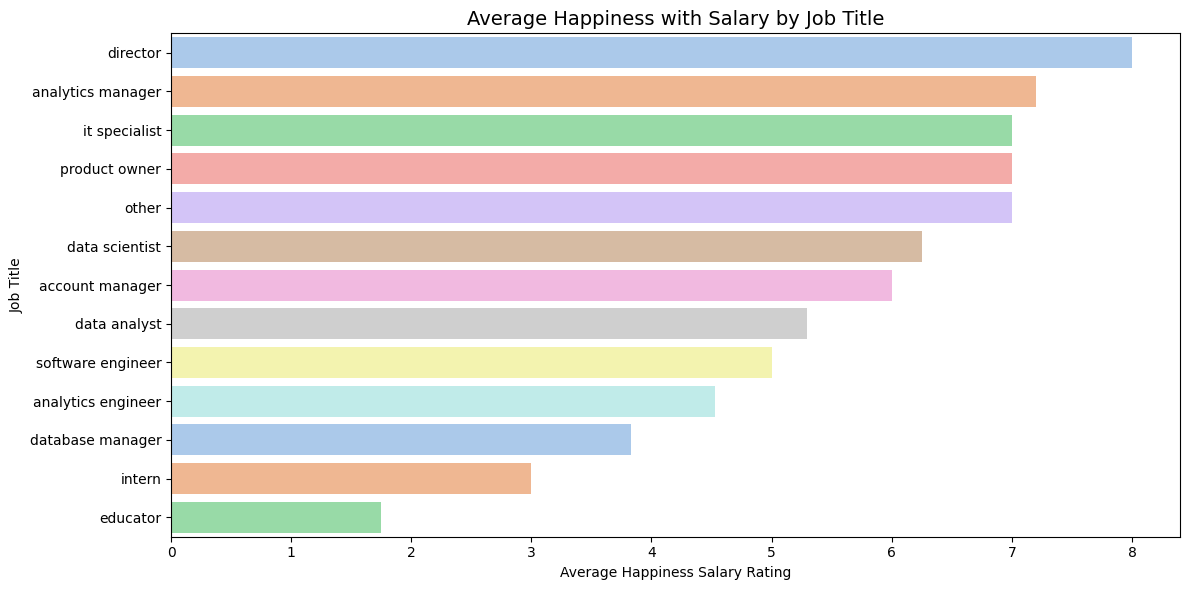

In [47]:
#Visualize it with barchart
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
avg_happiness_table = project3.groupby('Grouped_Job_Title')['Happiness_Salary'].mean().reset_index()
avg_happiness_table = avg_happiness_table.sort_values(by='Happiness_Salary', ascending=False)

# Set plot size
plt.figure(figsize=(12, 6))

# Create barplot
sns.barplot(data=avg_happiness_table, x='Happiness_Salary', y='Grouped_Job_Title', palette='pastel')

# Add titles and labels
plt.title('Average Happiness with Salary by Job Title', fontsize=14)
plt.xlabel('Average Happiness Salary Rating')
plt.ylabel('Job Title')

# Show the plot
plt.tight_layout()
plt.show()


In [49]:
# Group by country and calculate mean happiness_worklife
worklife_by_country = project3.groupby('Country')['Happiness_WorkLife'].mean().sort_values(ascending=False)

# Display the result
print(worklife_by_country)


Country
United States     6.682292
Canada            6.590909
United Kingdom    5.818182
Name: Happiness_WorkLife, dtype: float64


<ipython-input-51-5de241fbfd26>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worklife_by_country, x='Happiness_WorkLife', y='Country', palette='Blues_r')


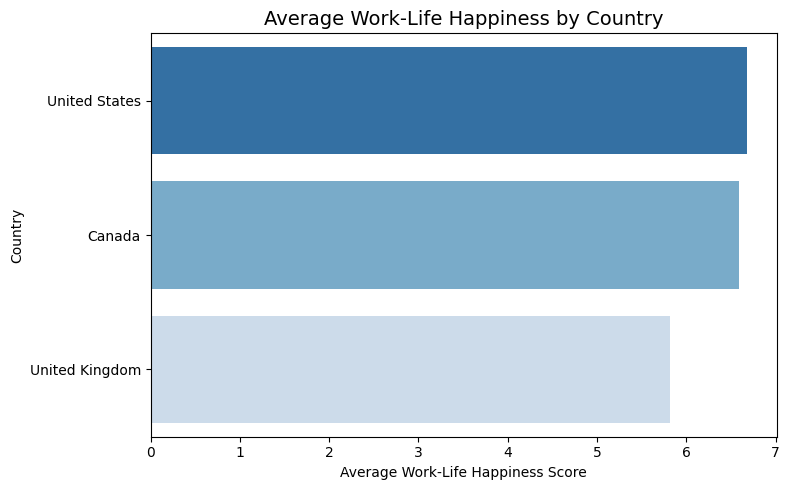

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate the summary if not already available
worklife_by_country = project3.groupby('Country')['Happiness_WorkLife'].mean().sort_values(ascending=False).reset_index()

# Set up the plot
plt.figure(figsize=(8, 5))
sns.barplot(data=worklife_by_country, x='Happiness_WorkLife', y='Country', palette='Blues_r')

# Titles and labels
plt.title('Average Work-Life Happiness by Country', fontsize=14)
plt.xlabel('Average Work-Life Happiness Score')
plt.ylabel('Country')

# Display the plot
plt.tight_layout()
plt.show()

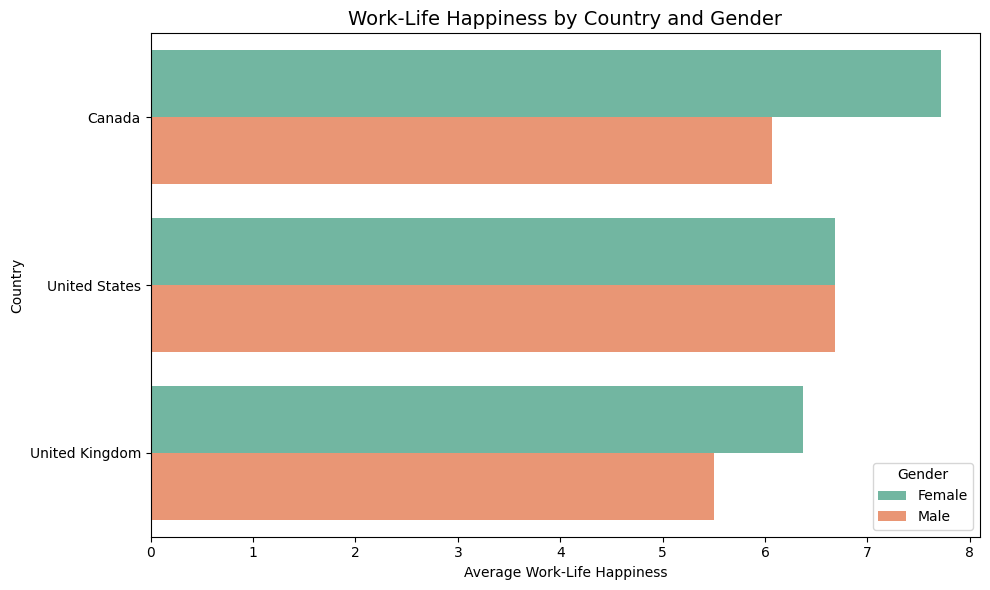

In [53]:
# Group by country and gender, calculate average work-life happiness
worklife_gender_country = (
    project3.groupby(['Country', 'Gender'])['Happiness_WorkLife']
    .mean()
    .reset_index()
    .sort_values(by='Happiness_WorkLife', ascending=False)
)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=worklife_gender_country,
    x='Happiness_WorkLife',
    y='Country',
    hue='Gender',
    palette='Set2'
)

# Customize
plt.title('Work-Life Happiness by Country and Gender', fontsize=14)
plt.xlabel('Average Work-Life Happiness')
plt.ylabel('Country')
plt.legend(title='Gender', loc='lower right')

plt.tight_layout()
plt.show()

Univariate Analysis (Graphical and Non-Graphical)
• Gender-Based Visualizations

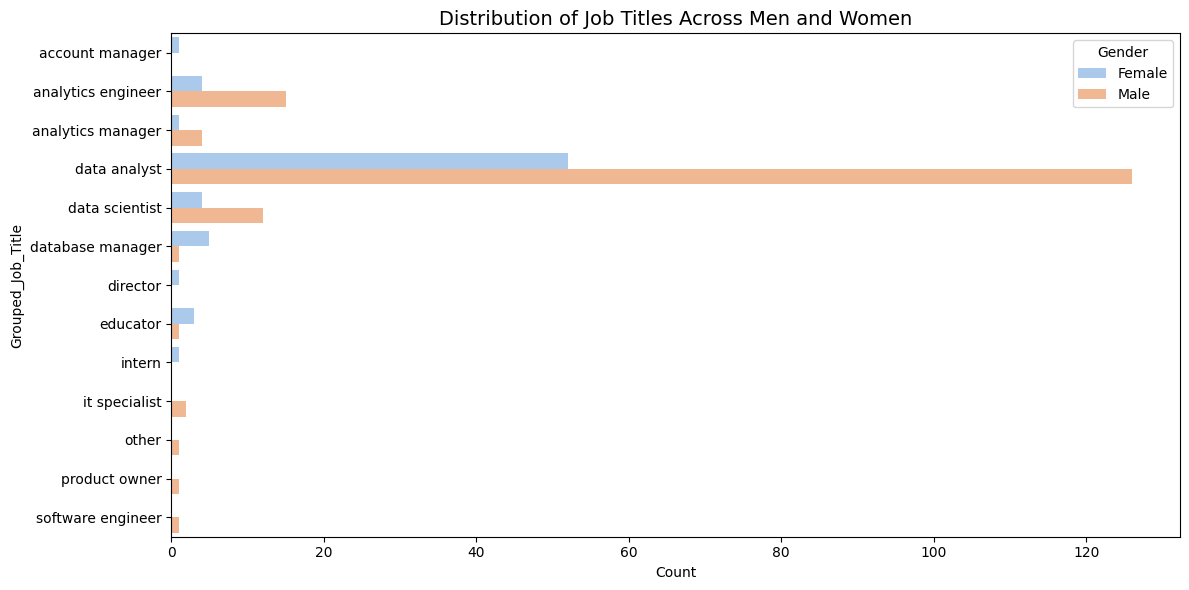

In [55]:
#Use a bar chart to show the distribution of job titles across men and women.
# Count number of people by job title and gender
#prepare the data
job_gender_counts = (
    project3.groupby(['Grouped_Job_Title', 'Gender'])
    .size()
    .reset_index(name='count')
)

#visualize it
plt.figure(figsize=(12, 6))
sns.barplot(
    data=job_gender_counts,
    x='count',
    y='Grouped_Job_Title',
    hue='Gender',
    palette='pastel'
)

plt.title('Distribution of Job Titles Across Men and Women', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Grouped_Job_Title')
plt.legend(title='Gender', loc='best')

plt.tight_layout()
plt.show()

In [61]:
#count genders
gender_counts = project3['Gender'].value_counts()
gender_counts.head()

,count
Gender,
Male,164
Female,72


<ipython-input-62-3ddacf6ef9c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


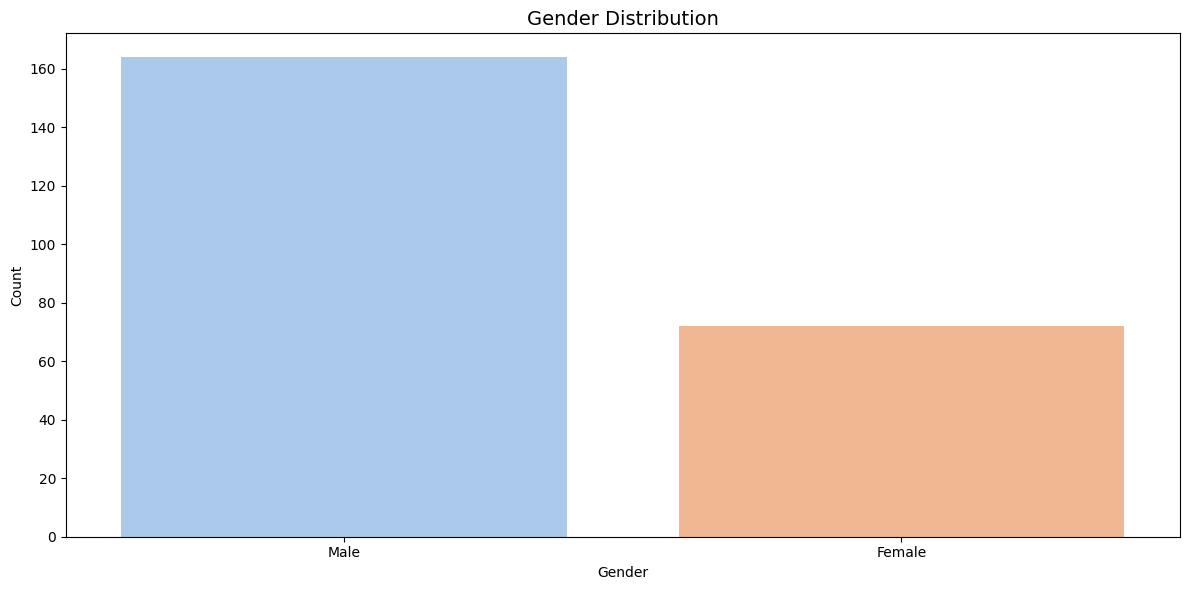

In [62]:
#visualize it
plt.figure(figsize=(12, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')

plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()


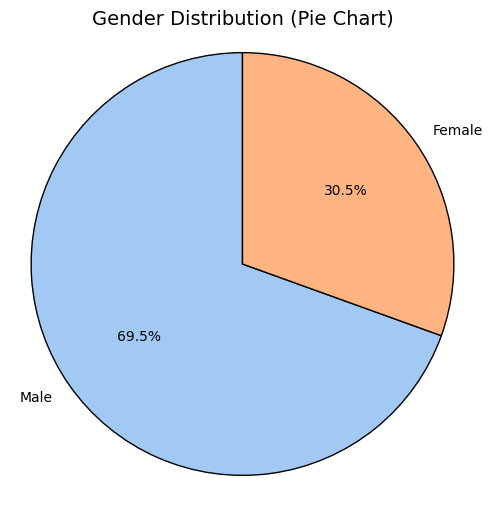

In [63]:
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Gender Distribution (Pie Chart)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

In [80]:
top_languages = project3['Fav_Language'].value_counts().head(3).index.tolist() #identify the data

filtered_project3 = project3[project3['Fav_Language'].isin(top_languages)] #filter the data

# Count number of people by job title, language, and gender
lang_job_gender = (
    filtered_project3.groupby(['Grouped_Job_Title', 'Fav_Language', 'Gender'])
    .size()
    .reset_index(name='count')
)



In [84]:

 # Create a pivot table with genders as columns for stacking
pivot_data = lang_job_gender.pivot_table(
    index=['Grouped_Job_Title', 'Fav_Language'],
    columns='Gender',
    values='count',
    fill_value=0
).reset_index()

#pivot_data  #shows pivot table

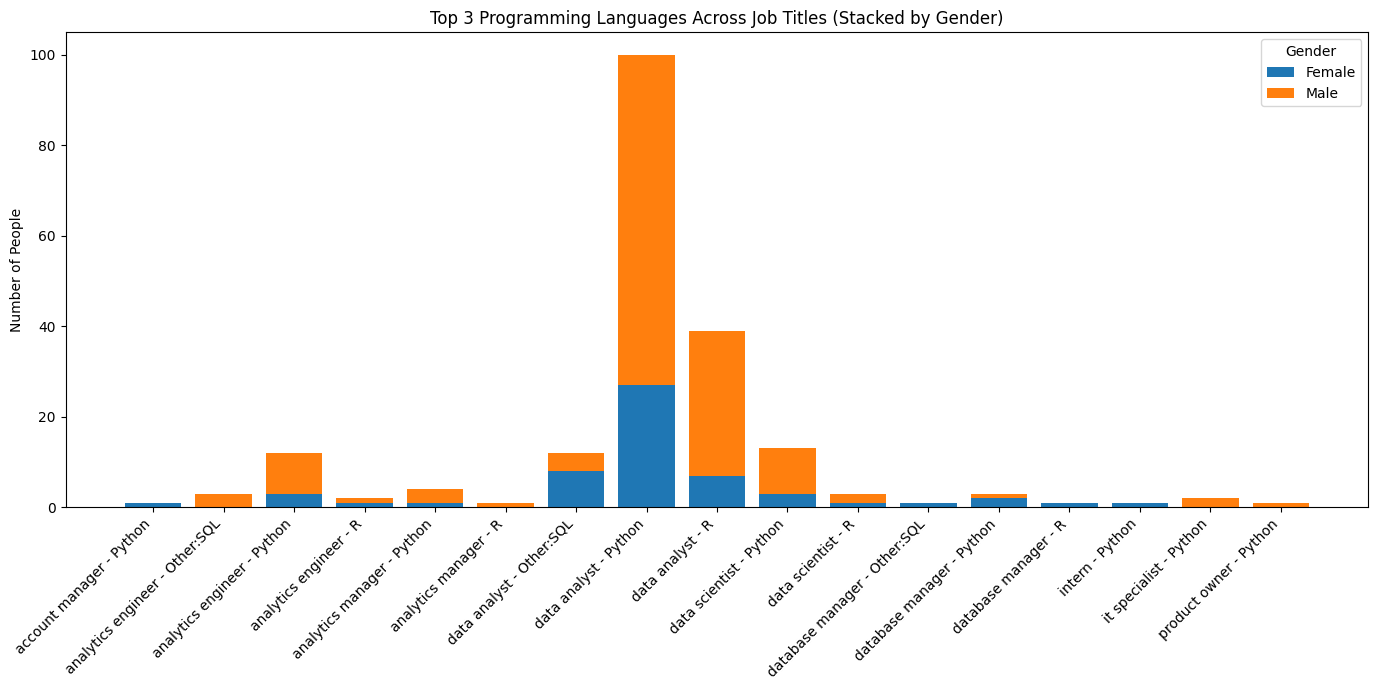

In [85]:
# Plot each language separately with stacking by gender
import numpy as np

fig, ax = plt.subplots(figsize=(14, 7))

# Assign positions for bars
job_lang = pivot_data['Grouped_Job_Title'] + ' - ' + pivot_data['Fav_Language']
x = np.arange(len(job_lang))

# Stack genders (add more if needed)
genders = pivot_data.columns[2:]  # all gender columns
bottom = np.zeros(len(pivot_data))

for gender in genders:
    ax.bar(x, pivot_data[gender], bottom=bottom, label=gender)
    bottom += pivot_data[gender]

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(job_lang, rotation=45, ha='right')
ax.set_ylabel('Number of People')
ax.set_title('Top 3 Programming Languages Across Job Titles (Stacked by Gender)')
ax.legend(title='Gender')

plt.tight_layout()
plt.show()


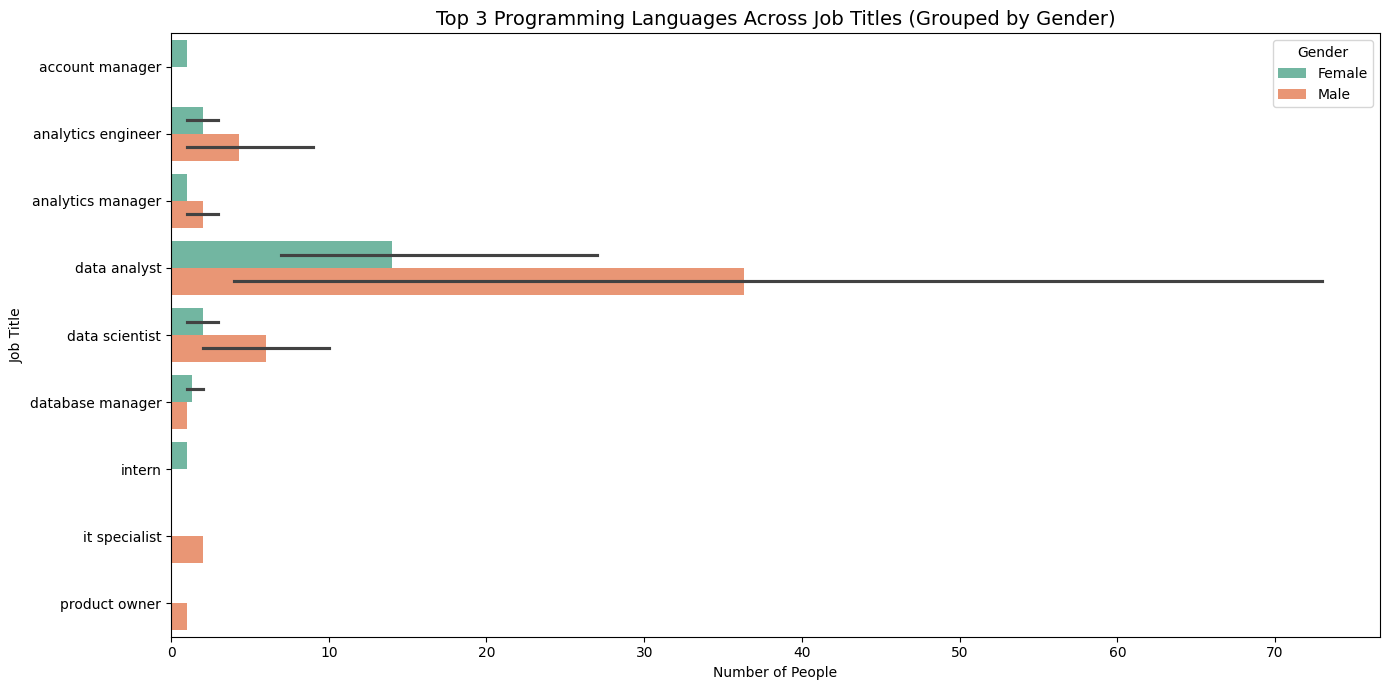

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get top 3 programming languages
top_languages = project3['Fav_Language'].value_counts().head(3).index.tolist()

# Step 2: Filter dataset
filtered_project3 = project3[project3['Fav_Language'].isin(top_languages)]

# Step 3: Group by job title, favorite language, and gender
lang_job_gender = (
    filtered_project3.groupby(['Grouped_Job_Title', 'Fav_Language', 'Gender'])
    .size()
    .reset_index(name='count')
)

# Step 4: Plot grouped bar chart
plt.figure(figsize=(14, 7))
sns.barplot(
    data=lang_job_gender,
    x='count',
    y='Grouped_Job_Title',
    hue='Gender',
    palette='Set2',
    dodge=True
)

# Add titles and labels
plt.title('Top 3 Programming Languages Across Job Titles (Grouped by Gender)', fontsize=14)
plt.xlabel('Number of People')
plt.ylabel('Job Title')

# Optional: filter for readability
# e.g., only show job titles with most entries if it's cluttered

plt.legend(title='Gender')
plt.tight_layout()
plt.show()


<ipython-input-88-cff169c392a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


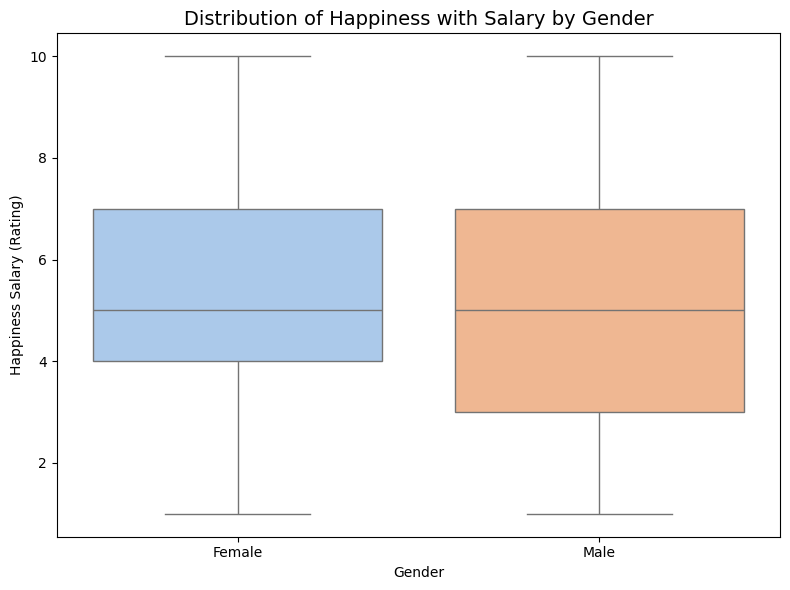

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=project3,
    x='Gender',
    y='Happiness_Salary',
    palette='pastel'
)

# Add title and labels
plt.title('Distribution of Happiness with Salary by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Happiness Salary (Rating)')

plt.tight_layout()
plt.show()
